<a href="https://colab.research.google.com/github/kelseypeltz/blackjackproject.github.io/blob/main/blackjack_dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rlcard[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 265 kB 11.2 MB/s 
     |████████████████████████████████| 182 kB 40.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for rlcard: filename=rlcard-1.0.9-py3-none-any.whl size=322180 sha256=7ddb25e81b971cac037f5f8bd7b8748ebcf6120fb587297e510f97e668a517d0
  Stored in directory: /root/.cache/pip/wheels/69/56/31/00e36d772b2b0277c5df2f7354077f1a69be8d9491f42a6125
Successfully built rlcard


In [13]:
import rlcard
from rlcard.agents import DQNAgent
from rlcard.agents import RandomAgent
from rlcard.agents import BlackjackHumanAgent

In [3]:
env = rlcard.make("blackjack")
print("Number of actions:", env.num_actions)
print("Number of players:", env.num_players)
print("Shape of state:", env.state_shape)
print("Shape of action:", env.action_shape)

Number of actions: 2
Number of players: 1
Shape of state: [[2]]
Shape of action: [None]


In [4]:
agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[64,64],
)
agent2 = RandomAgent(
    num_actions=env.num_actions
)

In [5]:
env.set_agents([agent])

In [6]:
from rlcard.utils import (
    tournament,
    reorganize,
    Logger,
    plot_curve,
)

In [7]:
with Logger("experiments/leduc_holdem_dqn_result/") as logger:
    for episode in range(1000):

        # Generate data from the environment
        trajectories, payoffs = env.run(is_training=True)

        # Reorganaize the data to be state, action, reward, next_state, done
        trajectories = reorganize(trajectories, payoffs)

        # Feed transitions into agent memory, and train the agent
        for ts in trajectories[0]:
            agent.feed(ts)

        # Evaluate the performance.
        if episode % 50 == 0:
            logger.log_performance(
                env.timestep,
                tournament(
                    env,
                    10000,
                )[0]
            )

    # Get the paths
    csv_path_dqn, fig_path_dqn = logger.csv_path, logger.fig_path


----------------------------------------
  timestep     |  1
  reward       |  -1.0
----------------------------------------

----------------------------------------
  timestep     |  19210
  reward       |  -1.0
----------------------------------------
INFO - Step 100, rl-loss: 2.067084550857544
INFO - Copied model parameters to target network.
INFO - Step 141, rl-loss: 1.848868727684021
----------------------------------------
  timestep     |  38436
  reward       |  -1.0
----------------------------------------
INFO - Step 204, rl-loss: 1.4896876811981201
----------------------------------------
  timestep     |  57800
  reward       |  -1.0
----------------------------------------
INFO - Step 270, rl-loss: 1.3464868068695068
----------------------------------------
  timestep     |  77010
  reward       |  -1.0
----------------------------------------
INFO - Step 348, rl-loss: 1.4712234735488892
----------------------------------------
  timestep     |  96288
  reward       |  -

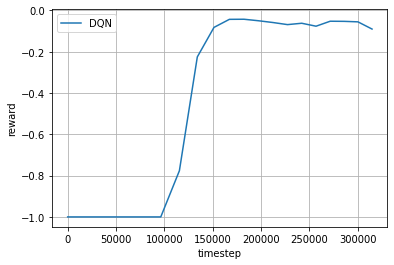

In [8]:
plot_curve(csv_path_dqn, fig_path_dqn, "DQN")

In [9]:
env.set_agents([agent2])

In [10]:
with Logger("experiments/leduc_holdem_random_result/") as logger:
    for episode in range(1000):

        # Generate data from the environment
        trajectories, payoffs = env.run(is_training=True)

        # Reorganaize the data to be state, action, reward, next_state, done
        trajectories = reorganize(trajectories, payoffs)

        # Feed transitions into agent memory, and train the agent
        for ts in trajectories[0]:
            agent.feed(ts)

        # Evaluate the performance.
        if episode % 50 == 0:
            logger.log_performance(
                env.timestep,
                tournament(
                    env,
                    10000,
                )[0]
            )

    # Get the paths
    csv_path_random, fig_path_random = logger.csv_path, logger.fig_path

INFO - Step 1381, rl-loss: 0.5394047498703003
----------------------------------------
  timestep     |  328977
  reward       |  -0.3966
----------------------------------------
INFO - Step 1453, rl-loss: 0.5408403873443604
----------------------------------------
  timestep     |  342820
  reward       |  -0.3793
----------------------------------------
INFO - Step 1517, rl-loss: 0.6561026573181152
----------------------------------------
  timestep     |  356722
  reward       |  -0.3798
----------------------------------------
INFO - Step 1593, rl-loss: 0.4648487865924835
----------------------------------------
  timestep     |  370533
  reward       |  -0.3962
----------------------------------------
INFO - Step 1655, rl-loss: 0.3788188099861145
----------------------------------------
  timestep     |  384326
  reward       |  -0.3859
----------------------------------------
INFO - Step 1724, rl-loss: 0.6706458926200867
----------------------------------------
  timestep     |  

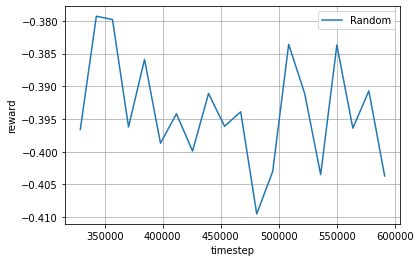

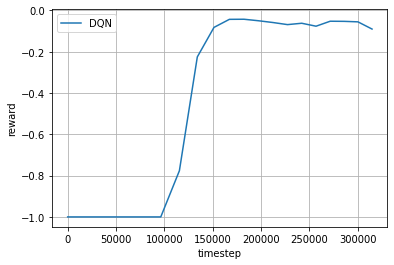

In [18]:
plot_curve(csv_path_random, fig_path_random, "Random")
plot_curve(csv_path_dqn, fig_path_dqn, "DQN")

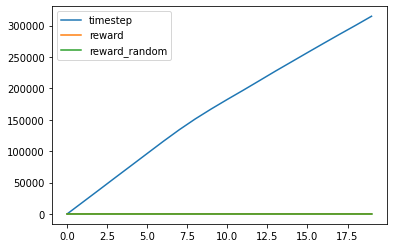

In [12]:
import pandas as pd
dqn_df = pd.read_csv(csv_path_dqn)
random_df = pd.read_csv(csv_path_random)
random_df = random_df.rename(columns={'reward': 'reward_random'})
reward = random_df["reward_random"]
dqn_df = dqn_df.join(reward)
dqn_df.plot()
